In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('F:/Rubyseven/CSV/Sessionstart.csv')

In [3]:
df.head(3)

,user_id,event_time,device_name,session_nb,user_country
0,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,10/14/2015 10:00,iPadAir,9,IN
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,10/14/2015 9:56,iPadAir,9,IN
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,10/14/2015 9:23,iPhone6,3,CN


## DATA FILL RATE

In [ ]:
# df.isnull().sum()

# user_id         0
# event_time      0
# device_name     0
# session_nb      0
# user_country    0

## ORGINAL DATA SHAPE

In [ ]:
# df.shape

# (42897, 5)

In [4]:
# Finding the duplicates

df.duplicated().sum()
# Duplicates - 10441

10441

In [5]:
# Distinct Users - 233

len(df['user_id'].value_counts())

233

### DATA TYPE

In [6]:
df.dtypes.value_counts()

object    4
int64     1
dtype: int64

### CONVERSION of OBJECT DATA TYPE DATETIME FORMAT

In [7]:
# Converting datatype of event_time to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

In [8]:
df1 = df

### Two variables 'Invoice Date' and 'Cohort Date' are created to capture latest invoice date and First invoice date

In [9]:
def getting_date(x):
    return dt.datetime(x.year,x.month,x.day)
df1['Invoice_date'] = df1['event_time'].apply(getting_date) 
grouping =  df1.groupby('user_id')['Invoice_date']
df1['Cohort_date'] = grouping.transform('min')
df1.tail()

,user_id,event_time,device_name,session_nb,user_country,Invoice_date,Cohort_date
42892,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-04 11:36:00,iPhone6S+,166,AU,2016-06-04,2015-11-30
42893,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-05 06:12:00,iPhone6S+,166,AU,2016-06-05,2015-11-30
42894,E2721B8A-6B6F-452D-AD3C-931B9EF444B0,2016-06-06 18:48:00,iPhone6,96,CA,2016-06-06,2016-04-24
42895,50B9563F-F04B-4E71-ABC4-68148C92CE4A,2016-06-07 20:04:00,iPadMini2,371,AU,2016-06-07,2016-03-07
42896,19D37913-882D-4930-911C-5A3D7F3114C5,2016-06-09 12:41:00,iPhone6S+,74,CA,2016-06-09,2016-04-23


In [10]:
def get_date_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year,month,day
    
invoice_year,invoice_month,invoice_day = get_date_int(df1,'Invoice_date')
cohort_year,cohort_month,cohort_day = get_date_int(df1,'Cohort_date')

year_diff = invoice_year-cohort_year
month_diff = invoice_month-cohort_month
day_diff = invoice_day - cohort_day

df1['Cohort_index'] = year_diff*0+month_diff*30+day_diff+1 
df1.head()

,user_id,event_time,device_name,session_nb,user_country,Invoice_date,Cohort_date,Cohort_index
0,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14 10:00:00,iPadAir,9,IN,2015-10-14,2015-09-25,20
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14 09:56:00,iPadAir,9,IN,2015-10-14,2015-09-25,20
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,2015-10-14 09:23:00,iPhone6,3,CN,2015-10-14,2015-09-29,16
3,C47A6FCE-6C76-41FE-9A6A-173AC7F01315,2015-10-14 09:21:00,iPod5,3,IN,2015-10-14,2015-09-24,21
4,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14 08:57:00,iPhone6+,3,IN,2015-10-14,2015-10-14,1


In [11]:
df1.tail()

,user_id,event_time,device_name,session_nb,user_country,Invoice_date,Cohort_date,Cohort_index
42892,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-04 11:36:00,iPhone6S+,166,AU,2016-06-04,2015-11-30,-175
42893,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-05 06:12:00,iPhone6S+,166,AU,2016-06-05,2015-11-30,-174
42894,E2721B8A-6B6F-452D-AD3C-931B9EF444B0,2016-06-06 18:48:00,iPhone6,96,CA,2016-06-06,2016-04-24,43
42895,50B9563F-F04B-4E71-ABC4-68148C92CE4A,2016-06-07 20:04:00,iPadMini2,371,AU,2016-06-07,2016-03-07,91
42896,19D37913-882D-4930-911C-5A3D7F3114C5,2016-06-09 12:41:00,iPhone6S+,74,CA,2016-06-09,2016-04-23,47


### Negating the effect of -ve number of days due to year difference 

In [12]:
ls = []
ls1=[]
for i in df1['Cohort_index']:
    ls.append(i)
for j in ls:
    if j<0:
        j = j+365
    else:
        j = j 
    ls1.append(j)

In [13]:
df2 = pd.DataFrame(ls1,columns = ['Cohort_index2'])

In [14]:
df1 = pd.concat([df1,df2],axis=1)

In [15]:
df1.tail()

,user_id,event_time,device_name,session_nb,user_country,Invoice_date,Cohort_date,Cohort_index,Cohort_index2
42892,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-04 11:36:00,iPhone6S+,166,AU,2016-06-04,2015-11-30,-175,190
42893,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-05 06:12:00,iPhone6S+,166,AU,2016-06-05,2015-11-30,-174,191
42894,E2721B8A-6B6F-452D-AD3C-931B9EF444B0,2016-06-06 18:48:00,iPhone6,96,CA,2016-06-06,2016-04-24,43,43
42895,50B9563F-F04B-4E71-ABC4-68148C92CE4A,2016-06-07 20:04:00,iPadMini2,371,AU,2016-06-07,2016-03-07,91,91
42896,19D37913-882D-4930-911C-5A3D7F3114C5,2016-06-09 12:41:00,iPhone6S+,74,CA,2016-06-09,2016-04-23,47,47


In [16]:
df1 = df1.drop(['Cohort_index'],axis=1)

In [17]:
df1.tail()

,user_id,event_time,device_name,session_nb,user_country,Invoice_date,Cohort_date,Cohort_index2
42892,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-04 11:36:00,iPhone6S+,166,AU,2016-06-04,2015-11-30,190
42893,0D7D3C91-B2AF-4DC8-8F3F-8951AA842EB6,2016-06-05 06:12:00,iPhone6S+,166,AU,2016-06-05,2015-11-30,191
42894,E2721B8A-6B6F-452D-AD3C-931B9EF444B0,2016-06-06 18:48:00,iPhone6,96,CA,2016-06-06,2016-04-24,43
42895,50B9563F-F04B-4E71-ABC4-68148C92CE4A,2016-06-07 20:04:00,iPadMini2,371,AU,2016-06-07,2016-03-07,91
42896,19D37913-882D-4930-911C-5A3D7F3114C5,2016-06-09 12:41:00,iPhone6S+,74,CA,2016-06-09,2016-04-23,47


### Final Shape after removing the duplicates

In [18]:
df1 = df1.drop_duplicates()
# FINAL SHAPE (32456, 8)

In [19]:
grouping = df1.groupby(['Cohort_date','Cohort_index2'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)

# Reseting the index
cohort_data = cohort_data.reset_index()

In [20]:
cohort_data = cohort_data[(cohort_data['Cohort_index2']==1)|(cohort_data['Cohort_index2']==3)|(cohort_data['Cohort_index2']==7) |(cohort_data['Cohort_index2']==15) |(cohort_data['Cohort_index2']==30)]

In [21]:
cohort_data.head()

,Cohort_date,Cohort_index2,user_id
0,2015-09-22,1,4
2,2015-09-22,3,1
3,2015-09-22,7,2
7,2015-09-22,15,3
25,2015-09-23,1,3


### Cohort Representation for Day 1, 3 7, 15 & 30

In [22]:
cohort_count = cohort_data.pivot(index='Cohort_date',columns='Cohort_index2',values='user_id')
cohort_count

Cohort_index2,1,3,7,15,30
Cohort_date,,,,,
2015-09-22,4.0,1.0,2.0,3.0,NaN
2015-09-23,3.0,NaN,NaN,1.0,NaN
2015-09-24,5.0,NaN,2.0,NaN,NaN
2015-09-25,1.0,NaN,NaN,NaN,NaN
2015-09-28,2.0,1.0,NaN,1.0,NaN
2015-09-29,4.0,NaN,NaN,2.0,NaN
2015-09-30,1.0,NaN,NaN,NaN,NaN
2015-10-06,1.0,NaN,NaN,NaN,NaN
2015-10-09,1.0,NaN,NaN,NaN,NaN


In [23]:
# Percentage Value Calculation

cohort_size = cohort_count.iloc[:,0]
ret = cohort_count.divide(cohort_size,axis=0)
ret.round(2)*100

Cohort_index2,1,3,7,15,30
Cohort_date,,,,,
2015-09-22,100.0,25.0,50.0,75.0,NaN
2015-09-23,100.0,NaN,NaN,33.0,NaN
2015-09-24,100.0,NaN,40.0,NaN,NaN
2015-09-25,100.0,NaN,NaN,NaN,NaN
2015-09-28,100.0,50.0,NaN,50.0,NaN
2015-09-29,100.0,NaN,NaN,50.0,NaN
2015-09-30,100.0,NaN,NaN,NaN,NaN
2015-10-06,100.0,NaN,NaN,NaN,NaN
2015-10-09,100.0,NaN,NaN,NaN,NaN


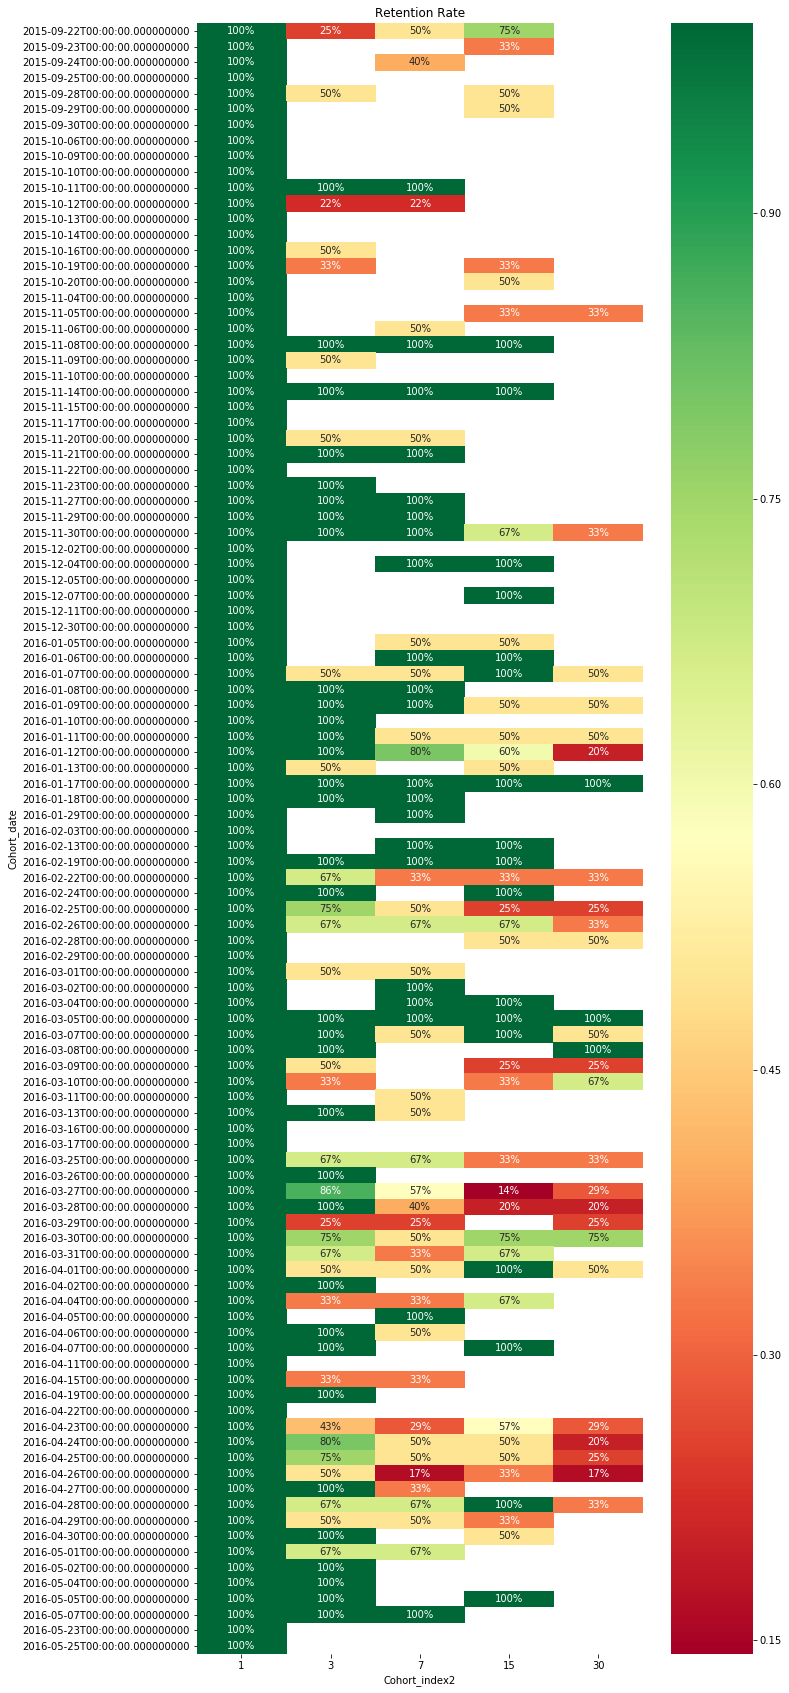

In [24]:
plt.figure(figsize=(10,30))
plt.title('Retention Rate')
sns.heatmap(data=ret,annot=True,fmt='.0%',cmap='RdYlGn')

### Cohort representation for DAY 1, 3 & 30

In [25]:
cohort_data2 = cohort_data[(cohort_data['Cohort_index2'] ==1) | (cohort_data['Cohort_index2'] ==3) | (cohort_data['Cohort_index2'] ==30)]
cohort_data2.shape

(194, 3)

In [26]:
cohort_count1 = cohort_data2.pivot(index='Cohort_date',columns='Cohort_index2',values='user_id')
cohort_count1

Cohort_index2,1,3,30
Cohort_date,,,
2015-09-22,4.0,1.0,NaN
2015-09-23,3.0,NaN,NaN
2015-09-24,5.0,NaN,NaN
2015-09-25,1.0,NaN,NaN
2015-09-28,2.0,1.0,NaN
2015-09-29,4.0,NaN,NaN
2015-09-30,1.0,NaN,NaN
2015-10-06,1.0,NaN,NaN
2015-10-09,1.0,NaN,NaN


In [27]:
cohort_size1 = cohort_count1.iloc[:,0]
ret = cohort_count1.divide(cohort_size1,axis=0)
ret.round(2)*100

Cohort_index2,1,3,30
Cohort_date,,,
2015-09-22,100.0,25.0,NaN
2015-09-23,100.0,NaN,NaN
2015-09-24,100.0,NaN,NaN
2015-09-25,100.0,NaN,NaN
2015-09-28,100.0,50.0,NaN
2015-09-29,100.0,NaN,NaN
2015-09-30,100.0,NaN,NaN
2015-10-06,100.0,NaN,NaN
2015-10-09,100.0,NaN,NaN


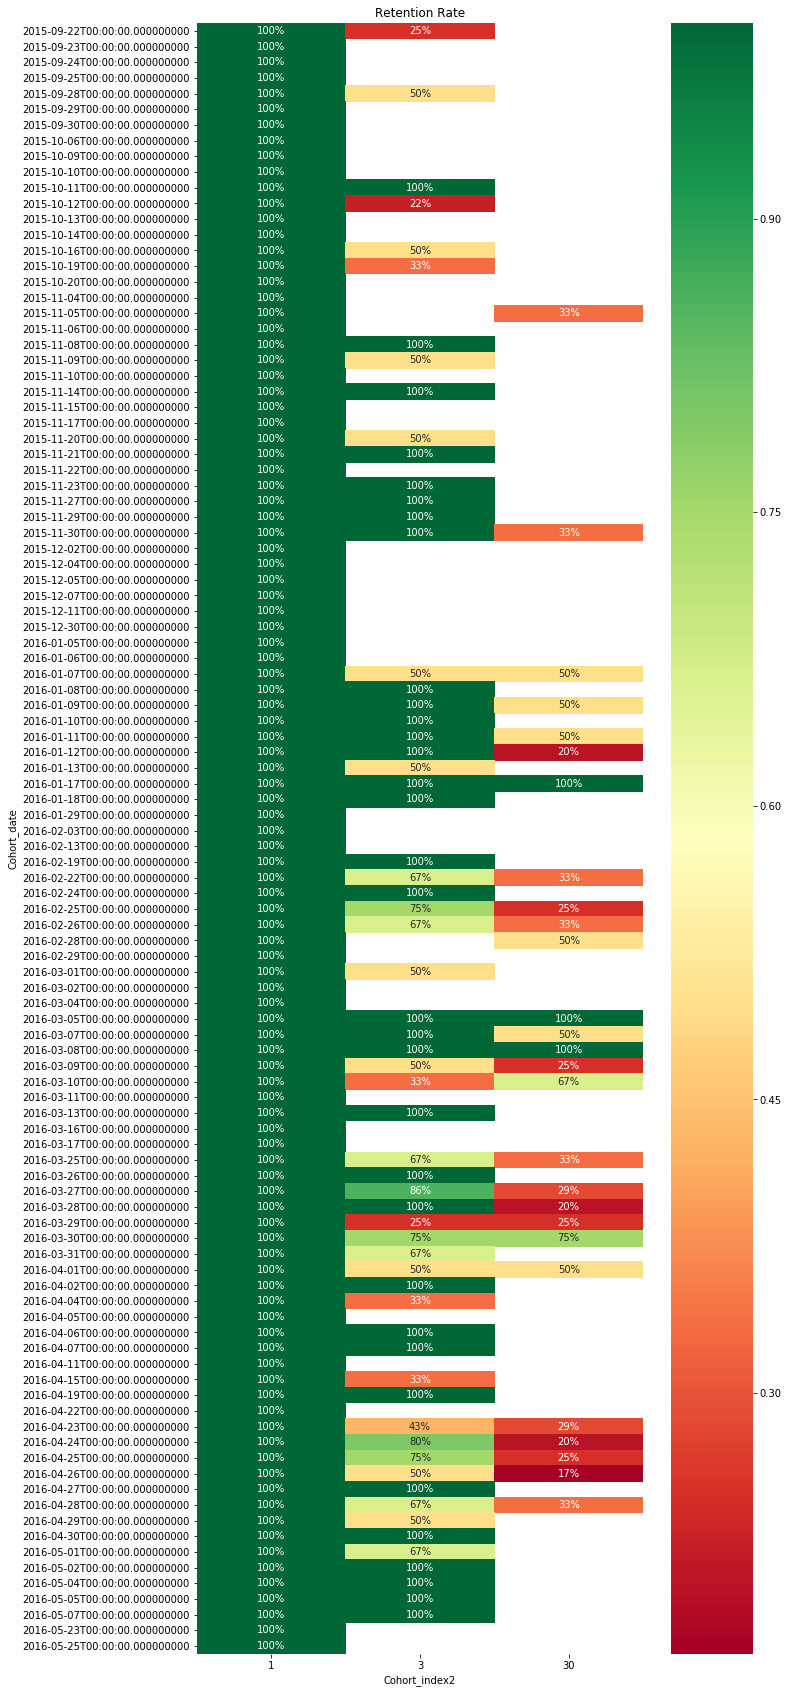

In [28]:
plt.figure(figsize=(10,30))
plt.title('Retention Rate')
sns.heatmap(data=ret,annot=True,fmt='.0%',cmap='RdYlGn')